# COGS 118A- Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Zhaoge Ouyang
- Bateliel Bassa
- Jason Hsu
- Kevin Thai
- Katelyn Dang

# Abstract 
Heart disease is one of the leading medical issues in the U.S. that has affected “as of 2018, 30.3 million U.S. adults”<a name="https://www.healthline.com/health/heart-disease/statistics"></a>[<sup>[1]</sup>](https://www.healthline.com/health/heart-disease/statistics) as reported by the CDC (Centers for Disease Control and Prevention). Our team would like to find out patterns that may lead to high risk of heart disease and possibly predict if a patient is at a high risk. We will be using 2020 annual CDC survey data of 320k adults related to their health status, provided on Kaggle. The data includes various variables regarding a patient's lifestyle and physical health, such as a person's BMI or whether they have smoked a certain number of cigarettes in their life, measured as a yes/no question. We will be training models to detect “patterns”, such that we can predict a patient’s heart condition and whether or not a patient is more likely to have heart diseases. We will split the dataset to 80% training, 10% validation, and 10% test set. With around 320,000 valid observations, the training set will have about 256,000 observations, while the validation and test set will have 64,000 observations each. The performance will be measured with accuracy.

# Background

Heart disease is one of the leading causes of death around the world. According to CDC, 659,000 people die from heart diseases in the United States. There are many factors that contribute to heart disease, including lifestyle and genetics. Health conditions such as high blood pressure, unhealthy blood cholesterol level, diabetes, and obesity increase the risk of heart dieseases. In addition, behaviors such as a diet high in saturated fat, trans fat, lack of physical exercise, alcohol abuse, tobacco use also increases a patient’s risk of heart diseases. Other than life styles, genetics and race also affect the risk of heart diseases. Genetic factors affect the risk of health conditions that are related to heart diseases, and some races are more likely to to be at risk of heart diseases than others. Lastly, heart diseases tend to happen more often as age goes up<a name="admonish"></a>[<sup>[2]</sup>](#admonishnote).

# Problem Statement

Currently, there aren’t many tools that are able to predict the likelihood of whether a patient is at risk of heart diseases based on their lifestyle and genetics. Therefore, we want to train a model that can properly make predictions on whether a patient may have heart disease.
 Whether the patient is at potential risk of heart disease will be measured as a simple 0 or 1 output, 0 for if the patient is less likely to be at risk and 1 for if the patient is at possible risk. By reviewing the prediction outcomes, we will also be able to determine which parameters contribute the most heavily to potential risk of heart diseases. Given appropriate data that matches the variables/parameters our model is trained on, the model should be able to produce a prediction of a patient’s risk for heart disease. 

# Data

We will be using 2020 annual CDC survey data of 320k adults related to their health status, obtained on Kaggle<a name="https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease"></a>[<sup>[3]</sup>](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease). The dataset includes 18 variables and ~320,000 observations. Variables includes health related status such as had heart disease, smoked 100 cigarettes in their lifetime, having at least 7 (female) /14 (male) drinks a week depending, had a stroke, considered their physical or mental health to be “unwell” over the past 30 days, difficulty walking up stairs, gender, age, and BMI.

The dataset includes various kinds of data types.Gender questions were answered as Male/Female, race was measured by the participants ethnicity, General health was measured on a likert scale, age category was answered as a range from 18-24 to 80-over, BMI and sleeping time was measured as a specific number, physical and mental health from a range from 0-30, and all other variables were answered as Yes/No.From the dataset, the data on heart diseases, smoking, age, physical activity, and race are the most important to help answer our research question. Smoking, age, physical activity, and race are suspected links to heart diseases and by studying and analyzing the data between heart diseases and these links, we may be able to find which variables can increase the risk of heart disease. 

To better handle the data, we will need to transform binary data types and categorical data into one-hot encoding (i.e. The Gender column would be split into Male and Female columns). In addition, there are only about 9% of data that are labeled as having heart disease or myocardial infarction. To combat the unbalanced proportion of data is to undersample our data (reduce the number of data that contains negative cases). Note that if we proceed with undersampling data, we will lose a lot of information. However, since the dataset is quite huge, we should still have a sufficient amount of data to work with. Another possible problem we may encounter is that many features seem to also be unbalanced (i.e. proportion of people who have kidney disease is much lower than people who don’t). Therefore, we may also need to balance weights by giving the smaller class more weights.


There are certain features of this dataset that may be particularly useful in attempting to predict risk for heart disease. Some of these features are smoking, drinking alcohol, physical health, mental health, age, physical activity, as well as sex and general health. Our reasoning for choosing these features as the most important is that they come from the CDC website regarding risks for heart disease<a name="https://www.cdc.gov/heartdisease/risk_factors.htm"></a>[<sup>[4]</sup>](https://www.cdc.gov/heartdisease/risk_factors.htm). These features also line up with what we would think are relevant factors to heart disease, especially features such as smoking and physical health and activity.

### Data Handling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
print(f'Columns:{df.columns}\nShapes:{df.shape}')

Columns:Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Shapes:(319795, 18)


Shapes shown above shows that there are 319795 # of participants, 18 columns (17 variables with 1 label we are trying to predict)

### Data Cleaning

Look at the unique values form each catagorical data and decide how to conver the data

In [4]:
print("Catagorical Data Unique Outputs")
print(f"Heart Disease: {df['HeartDisease'].unique()}")
print(f"Smoking: {df['Smoking'].unique()}")
print(f"Alcohol Drinking: {df['AlcoholDrinking'].unique()}")
print(f"Stroke: {df['Stroke'].unique()}")
print(f"Difficult in walking: {df['DiffWalking'].unique()}")
print(f"Sex: {df['Sex'].unique()}")
print(f"Age: {df['AgeCategory'].unique()}")
print(f"Race: {df['Race'].unique()}")
print(f"Diabetic: {df['Diabetic'].unique()}")
print(f"Physical Activity: {df['PhysicalActivity'].unique()}")
print(f"General Health: {df['GenHealth'].unique()}")
print(f"Asthma: {df['Asthma'].unique()}")
print(f"Kidney Disease: {df['KidneyDisease'].unique()}")
print(f"Skin Cancer: {df['SkinCancer'].unique()}")

Catagorical Data Unique Outputs
Heart Disease: ['No' 'Yes']
Smoking: ['Yes' 'No']
Alcohol Drinking: ['No' 'Yes']
Stroke: ['No' 'Yes']
Difficult in walking: ['No' 'Yes']
Sex: ['Female' 'Male']
Age: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Physical Activity: ['Yes' 'No']
General Health: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma: ['Yes' 'No']
Kidney Disease: ['No' 'Yes']
Skin Cancer: ['Yes' 'No']


#### Encode Guide
- Yes/No categories (multiple categories) => binary (1/0)
- Race => one hot encoding
- Diabetic => one hot encoding
- Age => int rank (order encoded)
- Sex => binary (renamed to Male as in Male = 1, Female = 0)
- General Health category => int rank (order encoded)


In [5]:
# Functions
yes_no_to_binary = lambda elem : 1 if elem == 'Yes' else 0
sex_to_binary = lambda elem : 1 if elem == 'Male' else 0
def genhealth_to_rank(elem):
    if elem == 'Excellent':
        return 4
    if elem == 'Very good':
        return 3
    if elem == 'Good':
        return 2
    if elem == 'Fair':
        return 1
    if elem == 'Poor':
        return 0
    return "ERROR"

def encode_age(age):
    if age == '18-24':
        return 18
    elif age == '25-29':
        return 25
    elif age == '30-34':
        return 30
    elif age == '35-39':
        return 35
    elif age == '40-44':
        return 40
    elif age == '45-49':
        return 45
    elif age == '50-54':
        return 50
    elif age == '55-59':
        return 55
    elif age == '60-64':
        return 60
    elif age == '65-69':
        return 65
    elif age == '70-74':
        return 70
    elif age == '75-79':
        return 75
    return 80

In [6]:
# Yes/No Convertion
df['HeartDisease'] = df['HeartDisease'].apply(yes_no_to_binary)
df['Smoking'] = df['Smoking'].apply(yes_no_to_binary)
df['AlcoholDrinking'] = df['AlcoholDrinking'].apply(yes_no_to_binary)
df['Stroke'] = df['Stroke'].apply(yes_no_to_binary)
df['DiffWalking'] = df['DiffWalking'].apply(yes_no_to_binary)
df['PhysicalActivity'] = df['PhysicalActivity'].apply(yes_no_to_binary)
df['Asthma'] = df['Asthma'].apply(yes_no_to_binary)
df['KidneyDisease'] = df['KidneyDisease'].apply(yes_no_to_binary)
df['SkinCancer'] = df['SkinCancer'].apply(yes_no_to_binary)

# Dummy Variables Convertion
dummy_race = pd.get_dummies(df['Race'])
dummy_race.rename(columns={'American Indian/Alaskan Native':'American_Indian/Alaskan_Native'}, inplace=True)
dummy_race.rename(columns={'Other':'Other_Race'}, inplace=True)
df = pd.concat([df, dummy_race], axis=1).drop('Race', axis=1)

dummy_diabetic = pd.get_dummies(df['Diabetic'])
dummy_diabetic.rename(columns={'No, borderline diabetes':'No,Borderline_Diabetic'}, inplace=True)
dummy_diabetic.rename(columns={'Yes (during pregnancy)':'Yes(during_pregnancy)'}, inplace=True)
df = pd.concat([df, dummy_diabetic], axis=1).drop('Diabetic', axis=1)

# Age Convertion
df.rename(columns={'AgeCategory':'Age'}, inplace=True)
df['Age'] = df['Age'].apply(encode_age)

# Sex Convertion
df.rename(columns={'Sex':'Male'}, inplace=True)
df['Male'] = df['Male'].apply(sex_to_binary)

# General Health Convertion
df['GenHealth'] = df['GenHealth'].apply(genhealth_to_rank)

### EDA

In [7]:
# Show datatype of cleaned data
df.dtypes

HeartDisease                        int64
BMI                               float64
Smoking                             int64
AlcoholDrinking                     int64
Stroke                              int64
PhysicalHealth                    float64
MentalHealth                      float64
DiffWalking                         int64
Male                                int64
Age                                 int64
PhysicalActivity                    int64
GenHealth                           int64
SleepTime                         float64
Asthma                              int64
KidneyDisease                       int64
SkinCancer                          int64
American_Indian/Alaskan_Native      uint8
Asian                               uint8
Black                               uint8
Hispanic                            uint8
Other_Race                          uint8
White                               uint8
No                                  uint8
No,Borderline_Diabetic            

In [8]:
# View the distribution of the data
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Male,Age,...,American_Indian/Alaskan_Native,Asian,Black,Hispanic,Other_Race,White,No,"No,Borderline_Diabetic",Yes,Yes(during_pregnancy)
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,52.440945,...,0.016267,0.025229,0.071730,0.085824,0.034172,0.766779,0.843206,0.021204,0.127588,0.008002
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,18.069747,...,0.126499,0.156819,0.258041,0.280104,0.181671,0.422883,0.363607,0.144065,0.333631,0.089095
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,55.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,80.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As shown above, the amount of people who does not have heart disease significantly outweights people who have. therefore there's a mean of 0.085595 for the binary (0, 1) column.

Below, we decided to visualize the correlation of smoking with heart disease and the correlation of age vs heart disease. These two are among the common features that causes heart diseases.

Text(0.5, 1.0, 'Percentage of Heart Disease Patients that Smoke vs Does not Smoke')

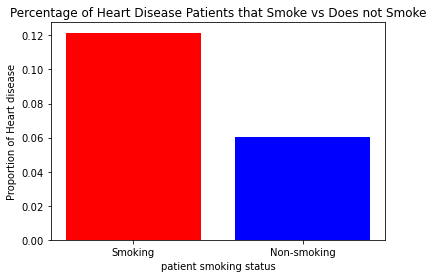

In [9]:
fig, ax = plt.subplots(figsize = (6,4))

heart_disease_smoking_cnt = len(df[(df['HeartDisease']==1) & (df['Smoking']==1)]['Smoking'])
smoking_cnt = len(df[df['Smoking']==1]['Smoking'])
heart_disease_no_smoking_cnt = len(df[(df['HeartDisease']==1) & (df['Smoking']==0)]['Smoking'])
non_smoking_cnt = len(df[df['Smoking']==0]['Smoking'])

smoking_heart_diseases = heart_disease_smoking_cnt/smoking_cnt
not_smoking_heart_diseases = heart_disease_no_smoking_cnt/non_smoking_cnt

ax.bar(["Smoking", "Non-smoking"], [smoking_heart_diseases, not_smoking_heart_diseases], color=['r','b'])
ax.set_xlabel("patient smoking status")
ax.set_ylabel("Proportion of Heart disease")
plt.title("Percentage of Heart Disease Patients that Smoke vs Does not Smoke")

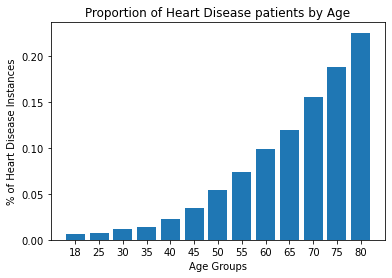

In [10]:
# visualize the proportion of heart disease vs age
x_label = ['18', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80']

count_by_age_df = df["Age"].value_counts()
count_by_age_arr = [count_by_age_df[int(i)] for i in x_label]

count_by_hd_age_df = df[df["HeartDisease"]==1]["Age"].value_counts()
count_by_hd_age_arr = [count_by_hd_age_df[int(i)] for i in x_label]

proportion = [count_by_hd_age_arr[i]/count_by_age_arr[i] for i in range(len(x_label))]

plt.figure(figsize=(6, 4))
plt.bar(x_label, proportion)
plt.xlabel("Age Groups")
plt.ylabel("% of Heart Disease Instances")
plt.title("Proportion of Heart Disease patients by Age")
plt.show()

# Proposed Solution

We will be developing a logistic regression and K-NN model, given parameters, such as smoking, alcohol drinking, and etc., to predict whether a patient is likely to have heart diseases or not. The goal of having both models is to find the best model that can make heart disease predictions. With logistic regression, we can also make inference on which variable influences the decision.

By discovering similar characteristics for patients who have heart disease, along with a substantial number of observations, we hope to apply some of these characteristics as a more general prediction for patients who could have heart disease in the future as a preventative measure. We would test this solution using k-folds cross validation between our selected models in order to better generalize our algorithm. We would be able to use this form of cross validation due to the large number of observations that are in our dataset.

# Evaluation Metrics

10% out of 320,000 observations in the total dataset will be used toward the test set. Note the proportion may be changed depending on how we modify our approach (we may need to reduce the number of patients with no heart disease to balance out the heart disease variable proportion).

The F1 score best fits our research question because it measures how correctly our data is classified without putting a heavier weight on True Positives or False Negatives since it is a harmonic mean between precision and recall. Additionally, we chose not to use the accuracy metric because our data is pretty unbalanced, with a very low proportion of patients with heart disease which can lead to a biased or misleading interpretation of results when using the accuracy metric. Therefore, F1 provides a more holistic interpretation of results, as it takes into account both precision and recall, while not be as affected by our unbalanced data like accuracy would.

# Preliminary results

### Data Split

Split the data into train/test, we will use stratified shuffle split as people who have heart disease heavily outweights people who does not.

Note (consistency):
random_state=1

In [11]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Male,Age,...,American_Indian/Alaskan_Native,Asian,Black,Hispanic,Other_Race,White,No,"No,Borderline_Diabetic",Yes,Yes(during_pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,0,55,...,0,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,0,80,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,...,0,0,0,0,0,1,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,...,0,0,0,0,0,1,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,40,...,0,0,0,0,0,1,1,0,0,0


In [12]:
from sklearn.model_selection import train_test_split

# Note Column Names Are Not Included
data = df.to_numpy()
X = data[:,1:]
y = data[:,0]

# Split data (with stratified shuffle split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y)

# Output shape of each dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((287815, 25), (31980, 25), (287815,), (31980,))

### Baseline Preformance Estimation

Here, we will preform a simple logistic regression to provide a baseline of what the most general case of logistic regression can provide.

In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000, random_state=1)
clf = logreg.fit(X_train, y_train)

print(f'Accuracy on Train set: {clf.score(X_train, y_train)}')
print(f'Accuracy on Test set: {clf.score(X_test, y_test)}')

Accuracy on Train set: 0.9157236419227629
Accuracy on Test set: 0.916447779862414


In [14]:
from sklearn.metrics import classification_report

y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     29243
         1.0       0.56      0.11      0.19      2737

    accuracy                           0.92     31980
   macro avg       0.74      0.55      0.57     31980
weighted avg       0.89      0.92      0.89     31980



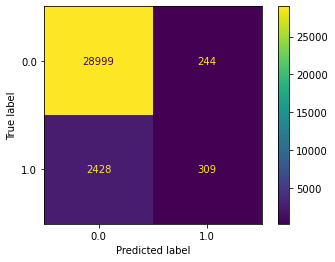

In [15]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test);
plt.grid(False);

Our baseline performance preforms extremely poorly. As shown by the confusion matrix above, logistic regression works decently well when looking at accuracy. However, the classification of whether a patient may have heart disease is more important when the patient actually has heart disease. When looking at its precision and recall, we can see that logistic regression does a poor job of classifying those with heart disease properly. Logistic regression only classified 56% of patients as having heart disease correctly out of all patients that it had classified as having heart disease (precision). Also, only a measly 11% were properly classified as having heart disease out of all patients who did (recall). With our focus on classification of patients having heart disease, recall is a very important metric as those with heart disease should be properly identified as having heart disease. In addition, the f1 score obtained is 0.19, this further shows our baseline algorithm's inability to predict correctly.

### Attempt to fix the issue

To fix the issue of unbalanced dataset in terms of labeling, there are few solutions on our mind. Below, we will be trying one of them by introducing class weight to logistic regression:

Accuracy on Train set: 0.7514062852874243
Accuracy on Test set: 0.7521575984990619
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     29243
         1.0       0.23      0.78      0.35      2737

    accuracy                           0.75     31980
   macro avg       0.60      0.76      0.60     31980
weighted avg       0.91      0.75      0.80     31980



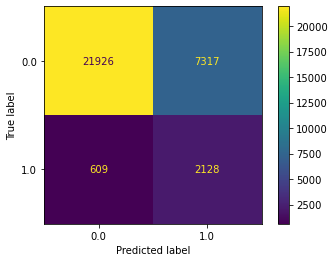

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

logreg = LogisticRegression(max_iter=5000, random_state=1, class_weight="balanced")
clf = logreg.fit(X_train, y_train)

print(f'Accuracy on Train set: {clf.score(X_train, y_train)}')
print(f'Accuracy on Test set: {clf.score(X_test, y_test)}')

y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

plot_confusion_matrix(clf,X_test,y_test);
plt.grid(False);

Above, we introduced class_weight with the "balanced" setting that sklearn have. Without dividng deep into the dataset (for now), this setting give us a much better recall value, while prevision worsten. However, we view this as an significant improvement as the more important recall score went from 0.11 (without class_weight) to 0.78 (with class_weight). F1 score also have an improvement through the combination of the significant increment of recall and decrease of precision. F1 score went from 0.19 (without class_weight) to 0.35 (with class_weight).

Note: there are still a significant room for improvement. There are more things we can try such as remove some of the healthy patient data to achieve balance, try out different algorithem, and manually adjust class weight.

# Ethics & Privacy

Our datasets will come from public datasets. Since our dataset comes from a survey that was collected by the CDC, the methods of data collection shouldn't be a violation of privacy as long as their name and personal information is not included. Additionally, in terms of data storage, we do not hold any personal information of the participants of the survey and it is a public dataset, so fears of data leakage or data deletion should not pose a problem. Additionally, this survey was taken by over 320,000 adults across all 50 states, so there is a very big sample to help decrease any bias and increase generalizability to adults in the U.S. Since, only about 10% of our data includes positive cases, this could lead to a potential bias towards a certain group or population in our data. To help ensure we don’t encounter any ethics or privacy problems in our project, we can use deon to check our project. 

# Team Expectations 

- Put things here that cement how you will interact/communicate as a team, how 
- Communicate through Discord
- Collaborate on coding through google collab
- Collaborate on reports through google doc 
- Weekly Team Meetings to evaluate progress and go over any issues/roadblocks
- Issues/roadblocks will be handled as a group if needed or giving guidance where confusion may have been caused
- Meeting scheduled goals/progression according to the timeline
- Roadblocks that may affect the timeline will be discussed and the timeline will be adjusted accordingly

# Project Timeline Proposal

UPDATE THE PROPOSAL TIMELINE ACCORDING TO WHAT HAS ACTUALLY HAPPENED AND HOW IT HAS EFFECTED YOUR FUTURE PLANS

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/20  | 5 PM  | Each Member clean or visualize own section (All) |Review/Edit wrangling/EDA; Revise from the proposal peer review, Work on Baseline Performance Evaluation, Submit Checkpoint 1   |
| 5/25  | 5 PM  | Finalize wrangling/EDA; Begin programming for project (All) | Discuss/edit project code; Complete project |
| 5/29  |  5 PM |  Finish the first major model.  | Discuss results and look for improvement. | 
| 6/1  |  5 PM |  Finish the second major model | Discuss results and look for improvement | 
| 6/02  | 5 PM | Complete analysis; Draft results/conclusion/discussion (Carlos)| Discuss/edit full project |
| 6/5  | 5 PM  | Complete Draft  | Discuss what to improve on. Gather questions for TA if we have any.   |
| 6/08  | 1 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="healthlinenote"></a>1.[^](#healthline):  Thomas, J. (16 July 2020) Heart Disease: Facts, Statistics, and You. Healthline Media. https://www.healthline.com/health/heart-disease/statistics <br>
<a name="admonishnote"></a>2.[^](#admonish): Heart Disease Facts CDC. https://www.cdc.gov/heartdisease/facts.htm <br>
<a name="sotanote"></a>3.[^](#sota): Data source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease <br>
<a name="sotanote"></a>4.[^](#sota): Know Your Risk for Heart Disease. CDC.: https://www.cdc.gov/heartdisease/risk_factors.htm